Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.
We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
!pip install plotly

In [2]:
!pip install feature_engine

In [3]:
!pip install wikipedia

In [4]:
!pip install chart_studio

Import the required libraries:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

Loading the dataset:

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Checking for the shape of the datset:

df.shape

(7043, 21)

i)The dataset contains 7043 rows and 21 columns including the target collumn.

ii)'Churn' is the target column.

In [12]:
# Checking for the columns names:

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Feature Columns:
1)'customerID'
2)'gender'
3)'SeniorCitizen'
4)'Partner'
5)'Dependents'
6)'tenure'
7)'PhoneService'
8)'MultipleLines'
9)'InternetService'
10)'OnlineSecurity'
11)'OnlineBackup'
12)'DeviceProtection'
13)'TechSupport'
14)'StreamingTV'
15)'StreamingMovies'
16)'Contract'
17)'PaperlessBilling'
18)'PaymentMethod'
19)'MonthlyCharges'
20)'TotalCharges'

Target Columns:
'Churn'

In [13]:
# Checking for the  datatype of the columns:

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
# Checking if there is any missing values present in the dataset:

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

i)There is no missing values is the dataset.
ii)On checking the dataset we found that there are some blank values present in the coulmn 'TotalCharges'.

In [15]:
# Changing the datatype of the column 'TotalCharges' from Object to float and replacing the blank values with NaN

df["TotalCharges"]=df["TotalCharges"].apply(lambda x: float(x) if len(x)>1 else np.nan)

In [16]:
# Checking for the missing values again:

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

i)We found that there are total 11 missing values in the
'TotalCharges' column of the dataset.
ii)There are no missing values in other columns.

Handling the missing values:

In [17]:
# Let's locate the rows of the 'TotalCharges' column which contain missing values:

df.loc[df['TotalCharges'].isna(),['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [18]:
# Since the value of 'tenure' is 0 so we'll replace the missing values of the 'TotalCharges' column with 0.

df['TotalCharges'].fillna(0, inplace=True)

In [19]:
# Checking for the missing values again:

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

i)We can see that, we have successfully removed the missing values of the column 'Totalcharges'

In [20]:
# Checking for the information of the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


i)There are 7043 rows and 21 columns in the dataset as said earlier.
ii)There is no missing value in the dataset as said earlier.
iii)The dataset contains float, integer, and object datatype.
iv)There are 17 object datatype columns, 2 integer datatype columns, and 2 float datatype columns.

Analyzing the target column:

In [21]:
# Checking for the value counts of the target column

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Target Column Distribution')

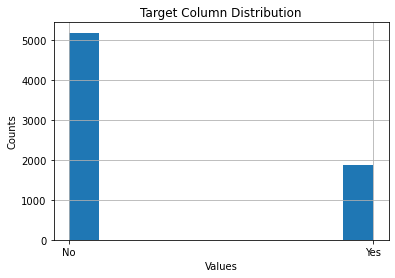

In [22]:
# Plotting histogram to show the distribution of target columnn

plt.figure(figsize=[6,4])
df['Churn'].hist(grid=True)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Target Column Distribution')

i)The above graph clearly shows that the target column is imbalance.
ii)We'll balance the target column in further steps.

### Data Visualization:

1.'Gender' column:

In [23]:
# Checking for the value counts of the 'gender' column

df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

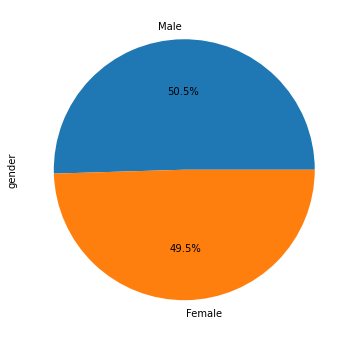

In [24]:
# Plotting pie plot to show the distribution of gender column

plt.figure(figsize=[6,6])
df['gender'].value_counts().plot.pie(autopct = '%.1f%%')

1)The distribution of male and female in the dataset is almost same.

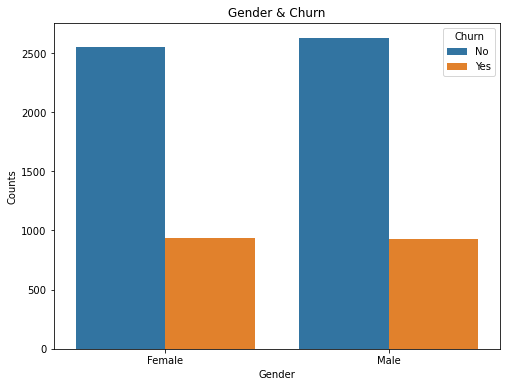

In [25]:
# Checking for the gender wise distribution of the target column

plt.figure(figsize=[8,6])
sns.countplot(x=df['gender'], hue=df['Churn'], data=df)
plt.title('Gender & Churn')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

Most of the female and male customers prefer to continue with the same telecom company.

2. 'SeniorCitizen' Column:

In [26]:
# Checking for the value counts of the SeniorCitizen column

df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:ylabel='SeniorCitizen'>

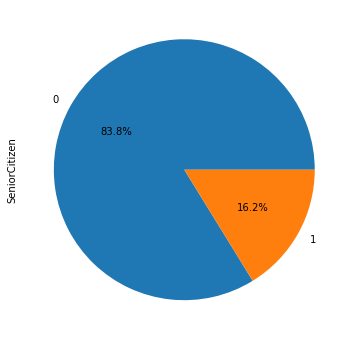

In [27]:
# Showing the distribution of the column SeniorCitizen on the pie plot:

plt.figure(figsize=[6,6])
df['SeniorCitizen'].value_counts().plot.pie( autopct = '%0.1f%%')

i)In the dataset only 16.2% customers are SeniorCitizen.
ii)Most of the customers are below the age of 60 years. (Considering 60+ as seniorcitizen)

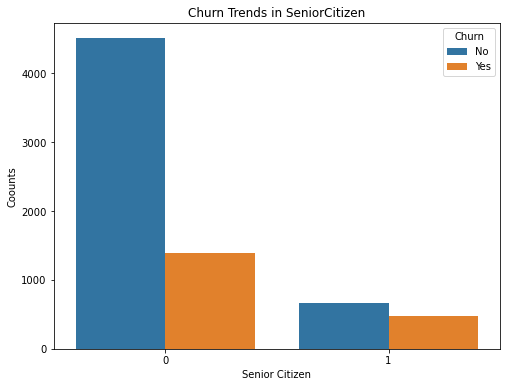

In [28]:
# Checking for the churn trends in the seniorcitizen

plt.figure(figsize=[8,6])
sns.countplot(x=df['SeniorCitizen'], hue=df['Churn'], data=df)
plt.xlabel('Senior Citizen')
plt.ylabel('Coounts')
plt.title('Churn Trends in SeniorCitizen')
plt.show()

i)The percentage of churn trend in the customers who are not senior citizen is less.

ii)In case of seniorcitizen the trend of churn is very high.

3. 'PhoneService' Column:

<AxesSubplot:ylabel='PhoneService'>

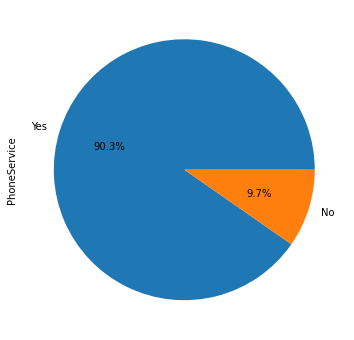

In [29]:
# Checking for the value counts 

plt.figure(figsize=[6,6])
df['PhoneService'].value_counts().plot.pie(autopct='%0.1f%%')

The graph shows that more than 90% customers have opted for phone service.

4. 'MultipleLines' column:

<AxesSubplot:ylabel='MultipleLines'>

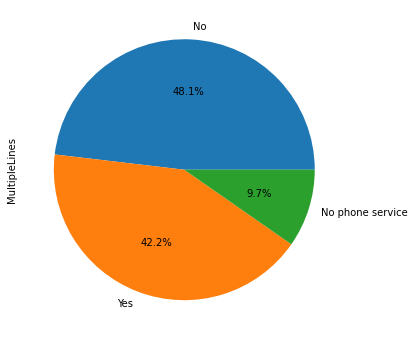

In [30]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['MultipleLines'].value_counts().plot.pie(autopct='%0.1f%%')

i)42.2% customers are using multiple lines service.
ii)48.1% customers are using single line.
iii)9.7% customers are not using phone service.

5.'InternetService' column:

<AxesSubplot:ylabel='InternetService'>

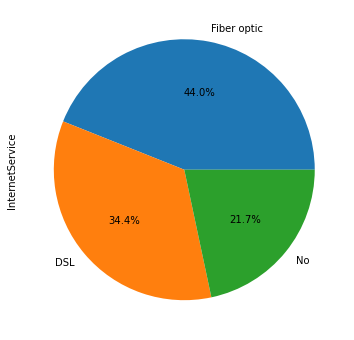

In [31]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['InternetService'].value_counts().plot.pie(autopct='%0.1f%%')

i)44% customers are using Fiber optic internet connection.
ii)34.4% customers are using DSL internet connection.
iii)21.7% customers are not using any internet services.

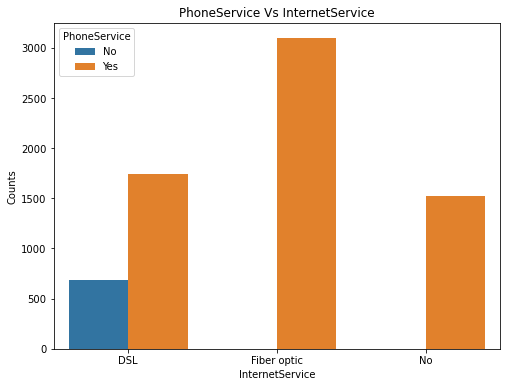

In [32]:
# Checking for the relation between 'PhoneService' and 'InternetService'

plt.figure(figsize=[8,6])
sns.countplot(x=df['InternetService'], hue=df['PhoneService'], data=df)
plt.title('PhoneService Vs InternetService')
plt.ylabel('Counts')

plt.show()

i)Approx 1500 customers is using phone service but they are not using any internet service.
ii)All the customers who are using fibre optic internet connection is also using phone service.
iii)Most of the customers who are using DSL internet connection are also using phone service but some of them are not using phone service they are only using internet service.

 6.'OnlineSecurity' column:

<AxesSubplot:ylabel='OnlineSecurity'>

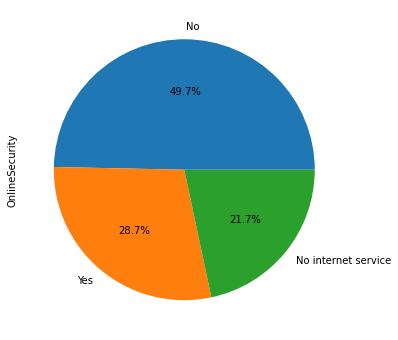

In [33]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['OnlineSecurity'].value_counts().plot.pie(autopct='%0.1f%%')

i)Only 28.7% customers are online secured.
ii)49.7% customers have no online security.

7. 'OnlineBackup' column:

<AxesSubplot:ylabel='OnlineBackup'>

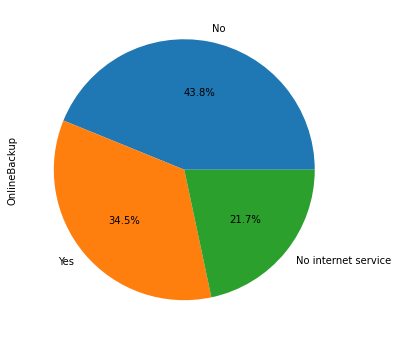

In [34]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['OnlineBackup'].value_counts().plot.pie(autopct='%0.1f%%')

i)34.5% customers who are using internet services have online backup.
ii)43.8% customers have no online backup.

 8.'DeviceProtection' column:

<AxesSubplot:ylabel='DeviceProtection'>

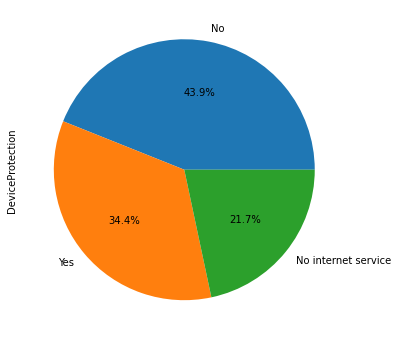

In [35]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['DeviceProtection'].value_counts().plot.pie(autopct='%0.1f%%')

34.4% customers are using device protection but most of the customers who are using internet services do not have any device protection.

9.'TechSupport' Column:

<AxesSubplot:ylabel='TechSupport'>

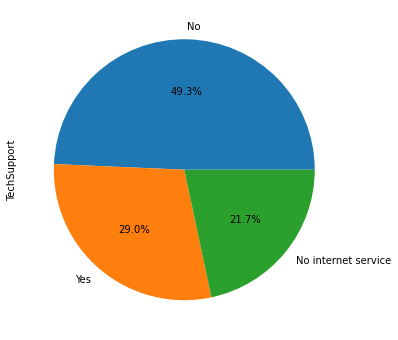

In [36]:
# Checking for the value counts:

plt.figure(figsize=[6,6])
df['TechSupport'].value_counts().plot.pie(autopct='%0.1f%%')

Approx 29% customers have used tech support who are using internet serive.

 10.'StreamingTV' column:

<AxesSubplot:ylabel='StreamingTV'>

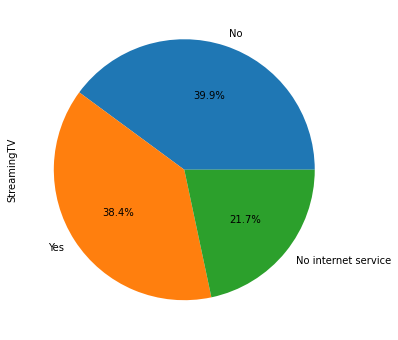

In [37]:
# Checking for the value counts:

plt.figure(figsize=[6,6])
df['StreamingTV'].value_counts().plot.pie(autopct='%0.1f%%')

In [ ]:
i)Approx 38% customers are streaming TV using internet.
ii)Approx 40% customers are not streaming TV.

11.'StreamingMovies' column:

<AxesSubplot:ylabel='StreamingMovies'>

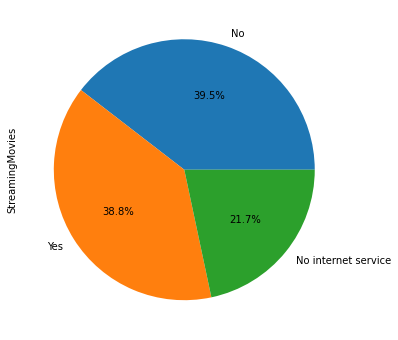

In [38]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['StreamingMovies'].value_counts().plot.pie(autopct='%0.1f%%')

The percentage of customers who are streaming movies is almost same who are streaming TV. So, we can make a assumption that the customers who are using streaming TV might be also streaming movies.

12.'Contract' column:

<AxesSubplot:ylabel='Contract'>

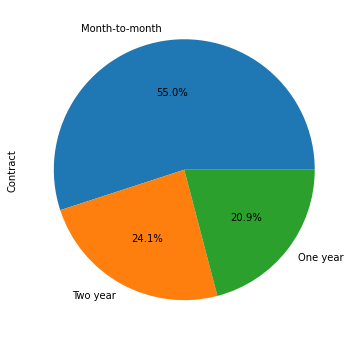

In [39]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['Contract'].value_counts().plot.pie(autopct='%0.1f%%')

i)55% customers are using monthly subscription plan.
ii)Approx 21% have contract for 1 year.
iii)Approx 24% have contract for 2 years.

iv)So, by looking at the above graph we can say that most of the customers have opted for monthly contract instead of going for any yearly subscription.

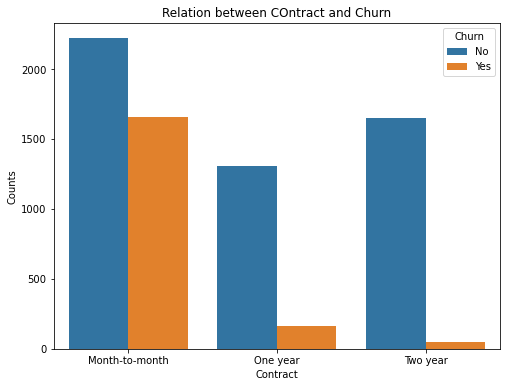

In [40]:
# Let's check the relationship between 'Customer churn' and 'Contract'

plt.figure(figsize=[8,6])
sns.countplot(x=df['Contract'], hue=df['Churn'], data=df)
plt.title('Relation between COntract and Churn')
plt.ylabel('Counts')
plt.xlabel('Contract')
plt.show()

Observations:

From the graph we can say that customers having monthly contract have high rate of churn as compared to the customers having one or two years of contract.

13.'PaperlessBilling' column:

<AxesSubplot:ylabel='PaperlessBilling'>

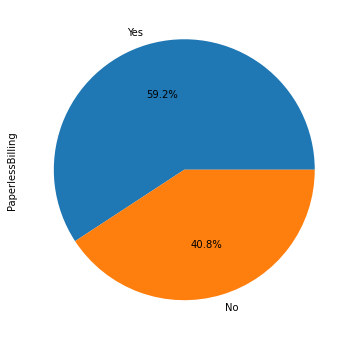

In [41]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['PaperlessBilling'].value_counts().plot.pie(autopct='%0.1f%%')

Approx 59% customers are using paperless billing option.

 14.'PaymentMethod' column

<AxesSubplot:ylabel='PaymentMethod'>

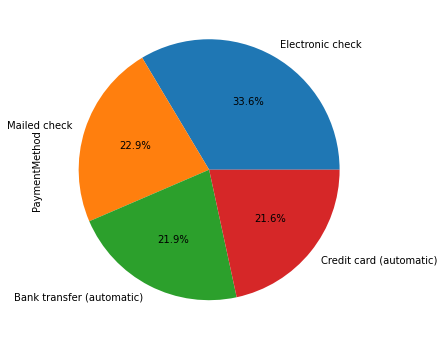

In [42]:
# Checking for the value counts

plt.figure(figsize=[6,6])
df['PaymentMethod'].value_counts().plot.pie(autopct='%0.1f%%')

Observations:

i)33.6% customers used electronic check as payment method.
ii)22.9% customers used mailed check as paayment method.
iii)21.9% customers used bank transfer (automatic) as payment method.
iv)21.6% customers used credit card (automatic) as payment method.

Label Encoding the categorical columns to convert into numerical columns:

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [44]:
# Label encoding the 'customerID' column
le.fit(df['customerID'].drop_duplicates())
le.classes_
df['customerID'] = le.transform(df['customerID'])

In [45]:
# Label encoding the 'Gender' column

le.fit(df['gender'].drop_duplicates())
le.classes_
df['gender'] = le.transform(df['gender'])

In [46]:
# Label encoding the 'Partner' column

le.fit(df['Partner'].drop_duplicates())
le.classes_
df['Partner'] = le.transform(df['Partner'])

In [47]:
# Label encoding the 'Dependents' column

le.fit(df['Dependents'].drop_duplicates())
le.classes_
df['Dependents'] = le.transform(df['Dependents'])

In [48]:
# Label encoding the 'PhoneService' column

le.fit(df['PhoneService'].drop_duplicates())
le.classes_
df['PhoneService'] = le.transform(df['PhoneService'])

In [49]:
# Label encoding the 'MultipleLines' column

le.fit(df['MultipleLines'].drop_duplicates())
le.classes_
df['MultipleLines'] = le.transform(df['MultipleLines'])

In [50]:
# Label encoding the 'InternetService' column

le.fit(df['InternetService'].drop_duplicates())
le.classes_
df['InternetService'] = le.transform(df['InternetService'])

In [51]:
# label encoding the 'OnlineSecurity' column

le.fit(df['OnlineSecurity'].drop_duplicates())
le.classes_
df['OnlineSecurity'] = le.transform(df['OnlineSecurity'])

In [52]:
# Label encoding the 'OnlineBackup' column

le.fit(df['OnlineBackup'].drop_duplicates())
le.classes_
df['OnlineBackup'] = le.transform(df['OnlineBackup'])

In [53]:
# Label encoding the 'DeviceProtection' column

le.fit(df['DeviceProtection'].drop_duplicates())
le.classes_
df['DeviceProtection'] = le.transform(df['DeviceProtection'])

In [54]:
# Label encoding the 'TechSupport' column

le.fit(df['TechSupport'].drop_duplicates())
le.classes_
df['TechSupport'] = le.transform(df['TechSupport'])

In [55]:
# Label encoding the 'StreamingTV' column

le.fit(df['StreamingTV'].drop_duplicates())
le.classes_
df['StreamingTV'] = le.transform(df['StreamingTV'])

In [56]:
# Label encoding the 'StreamingMovies' column

le.fit(df['StreamingMovies'].drop_duplicates())
le.classes_
df['StreamingMovies'] = le.transform(df['StreamingMovies'])

In [57]:
# Label encoding the 'Contract' column

le.fit(df['Contract'].drop_duplicates())
le.classes_
df['Contract'] = le.transform(df['Contract'])

In [58]:
# Label encoding the 'PaperlessBilling' column

le.fit(df['PaperlessBilling'].drop_duplicates())
le.classes_
df['PaperlessBilling'] = le.transform(df['PaperlessBilling'])

In [59]:
# Label encoding the 'PaymentMethod' column

le.fit(df['PaymentMethod'].drop_duplicates())
le.classes_
df['PaymentMethod'] = le.transform(df['PaymentMethod'])

In [60]:
# Label encoding the 'Churn' column 

le.fit(df['Churn'].drop_duplicates())
le.classes_
df['Churn'] = le.transform(df['Churn'])

In [61]:
# Checking for the dataset again after label encoding:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


array([[<AxesSubplot:title={'center':'customerID'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>],
       [<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>],
       [<AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>],
       [<AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>],
       [<AxesSubplot:title={'center':'PaperlessBilling'}>,
        <AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesS

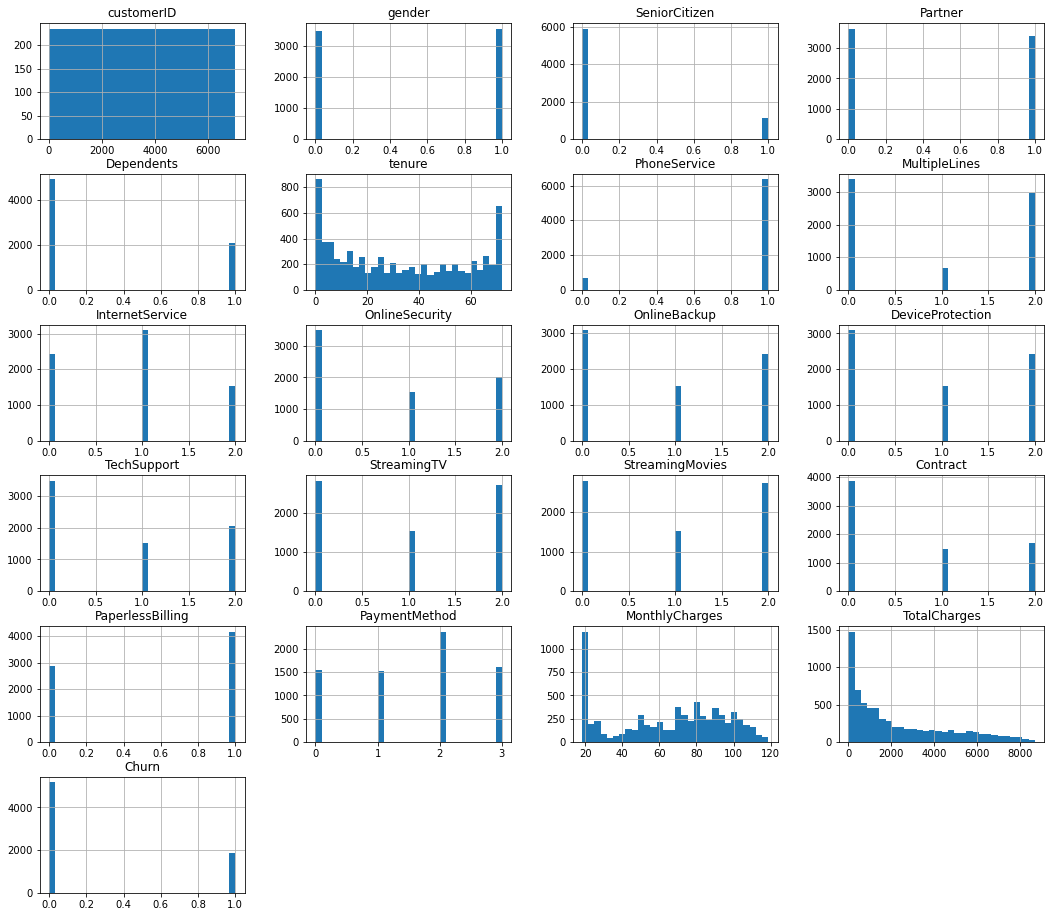

In [62]:
# Plotting the histogram for univariant analysis to check the normal distribution
df.hist(figsize=[18,16], grid=True, layout=(6,4), bins=30)

Checking for the Statistical Summary:

In [63]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


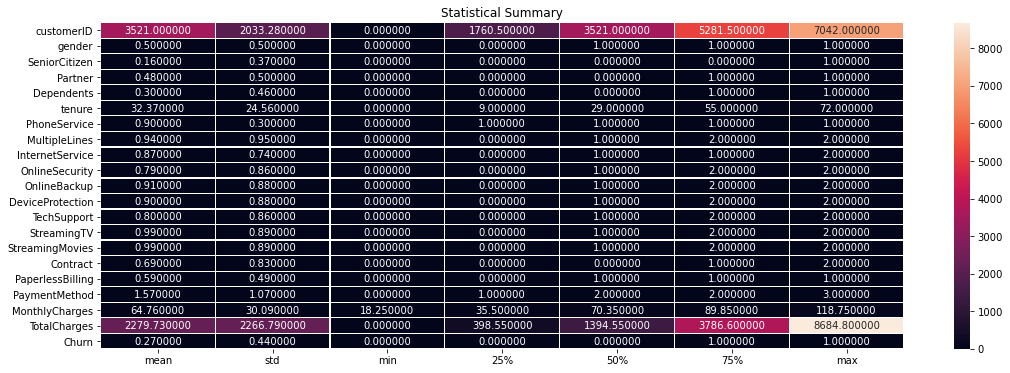

In [64]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[18,6])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

Checking for the Correlation of the variables:

In [65]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.000376,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309


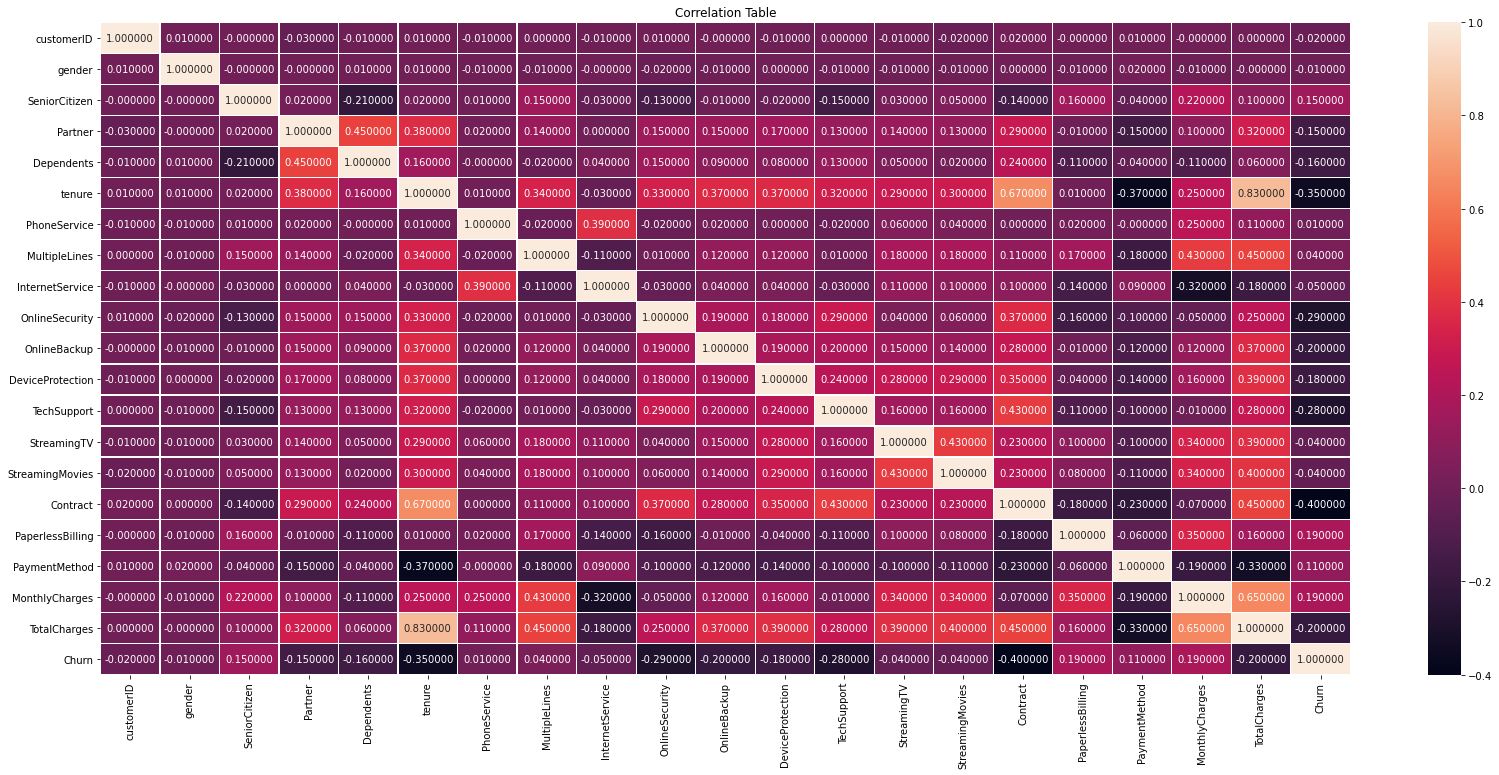

In [66]:
# Plotting heatmap for the correlation table

plt.figure(figsize=[28,12])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

Outcomes of correlation table:

i)PaperlessBilling and MonthlyCharges have 19% correlation with the target column.
ii)SeniorCitizen have 15% correlation with the target column.
iii)PaymentMethod have 11% correlation with the target column.
iv)Multiplelines have 4% correlation with the target column.
Phoneservice have 1% correlation with the target column.

Checking for the outliers:

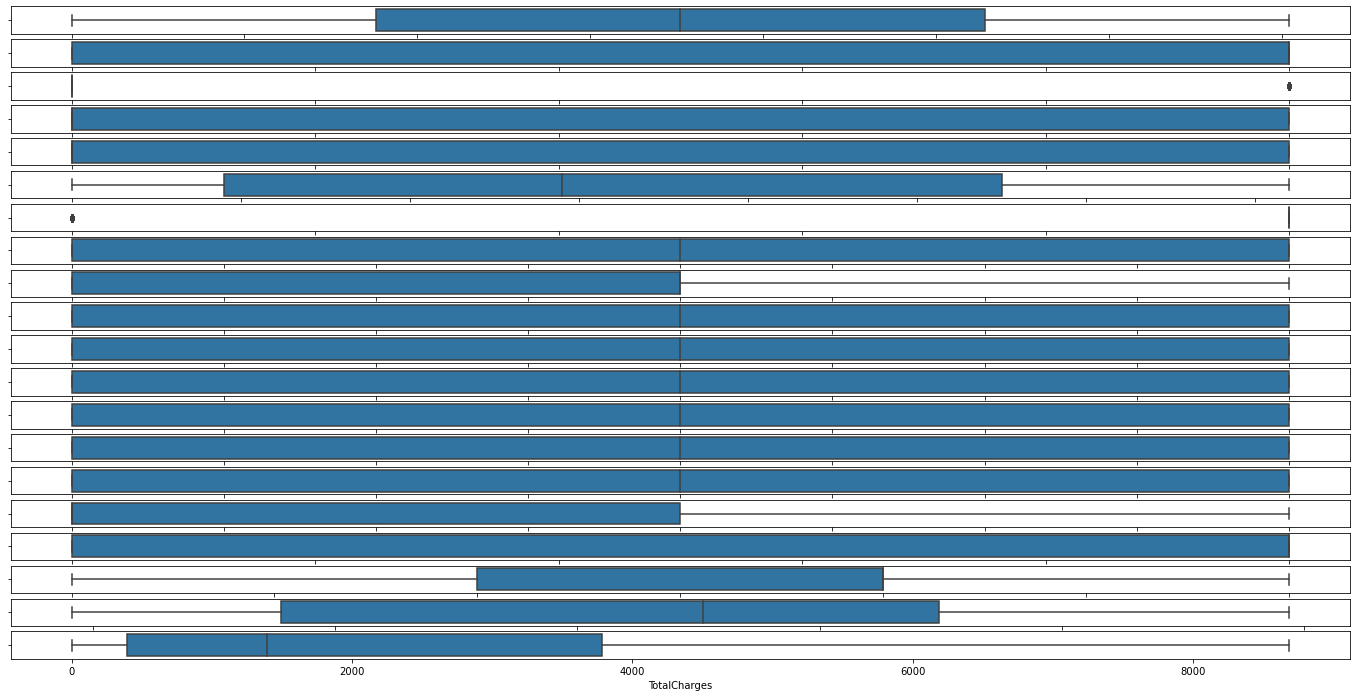

In [67]:
# Plotting boxplot to check the outliers
fig, axs = plt.subplots(20, figsize=[24,12])

plt1 = sns.boxplot(df['customerID'], ax=axs[0])
plt2 = sns.boxplot(df['gender'], ax = axs[1])
plt3 = sns.boxplot(df['SeniorCitizen'], ax = axs[2])
plt4 = sns.boxplot(df['Partner'], ax=axs[3])
plt5 = sns.boxplot(df['Dependents'], ax = axs[4])
plt6 = sns.boxplot(df['tenure'], ax= axs[5])
plt7 = sns.boxplot(df['PhoneService'], ax = axs[6])
plt8 = sns.boxplot(df['MultipleLines'], ax= axs[7])
plt9 = sns.boxplot(df['InternetService'], ax = axs[8])
plt10 = sns.boxplot(df['OnlineSecurity'], ax = axs[9])
plt11 = sns.boxplot(df['OnlineBackup'], ax = axs[10])
plt12 = sns.boxplot(df['DeviceProtection'], ax = axs[11])
plt13 = sns.boxplot(df['TechSupport'], ax =axs[12])
plt14 = sns.boxplot(df['StreamingTV'], ax =axs[13])
plt15 = sns.boxplot(df['StreamingMovies'], ax = axs[14])
plt16 = sns.boxplot(df['Contract'], ax = axs[15])
plt17 = sns.boxplot(df['PaperlessBilling'], ax = axs[16])
plt18 = sns.boxplot(df['PaymentMethod'], ax = axs[17])
plt19 = sns.boxplot(df['MonthlyCharges'], ax = axs[18])
plt20 = sns.boxplot(df['TotalCharges'], ax =axs[19])

From the boxplot we can say that there is no outliers present in the dataset.

Checking for the skewness:

In [68]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

Outcome of skewness:
Skewness threshold is taken as +/-0.5. Columns having skewness are:
1. SeniorCitizen
2. Dependents
3. PhoneService
4. Contract
5. TotalCharges
6. Churn

Removing skewness using power_transform:

In [69]:
# Splitting the dataset into feature and vector:

x = df.drop(['Churn'], axis =1)
y = df['Churn']

In [70]:
# Removing skewness

from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.1585412 , -1.79299643],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.23949171,  0.25480918],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.34266505, -1.37517297],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.16724064, -0.85276427],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.33431207, -0.91533153],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.33886338,  1.48509473]])

StandardScaler:

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.1585412 , -1.79299643],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.23949171,  0.25480918],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.34266505, -1.37517297],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.16724064, -0.85276427],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.33431207, -0.91533153],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.33886338,  1.48509473]])

Handling data imbalance by oversampling:

In [72]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [73]:
#Checking the value count of the target column after oversampling
y_over.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Finding best RandomState:

In [74]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,600):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8038647342995169  on Random_State  409


Data Preprocessing:

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=59)

Model Training:
LogisticRegression:

In [76]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8218594748048261
[[968  83]
 [168 190]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1051
           1       0.70      0.53      0.60       358

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



We're getting 82% accuracy from LogisticRegression.

RandomForestClassifier:

In [77]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
predRF = RF.predict(x_test)

print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8069552874378992
[[959  92]
 [180 178]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1051
           1       0.66      0.50      0.57       358

    accuracy                           0.81      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



From RandomForestClassifier, we're getting 81% accuracy score.

 DecisionTreeClassifier:

In [78]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
predDT = DT.predict(x_test)

print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.7288857345635202
[[842 209]
 [173 185]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1051
           1       0.47      0.52      0.49       358

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.73      0.73      1409



From DecisionTreeClassifier we're getting 72% accuracy score.

SVC:

In [79]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8140525195173882
[[972  79]
 [183 175]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1051
           1       0.69      0.49      0.57       358

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



We're getting 81% accuracy score from SVC.

Let's check for the crossvalidation score to decide the best fit model.

In [80]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("Cross Validation Score for LogisticRegression is ", scr.mean())

Cross Validation Score for LogisticRegression is  0.8067590046132009


In [81]:
scr = cross_val_score(RF, x, y, cv=5)
print("Cross Validation Score for RandomForestClassifier is ", scr.mean())

Cross Validation Score for RandomForestClassifier is  0.7908586844312536


In [82]:
scr = cross_val_score(DT, x, y, cv=5)
print("Cross Validation Score for DecisionTreeClassifier is ", scr.mean())

Cross Validation Score for DecisionTreeClassifier is  0.7279564407381122


In [83]:
scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation Score for SVC is ", scr.mean())

Cross Validation Score for SVC is  0.8026440213884767


As we checked, we're getting minimum difference between accuracy score and cross validation score is for SVC (1.14). So, the best fit model is SVC.

Hyper parameter tuning:

In [84]:
from sklearn.model_selection import GridSearchCV

#SVC:
params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [85]:
GCV = GridSearchCV(SVC(), params, cv=3)

In [86]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [87]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [88]:
model = SVC(C = 10, gamma = 0.001, kernel = 'rbf')
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8176011355571328
[[976  75]
 [182 176]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1051
           1       0.70      0.49      0.58       358

    accuracy                           0.82      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.81      0.82      0.81      1409



After hyper parameter tuning we got 82% accuracy score.

AUC ROC Curve:

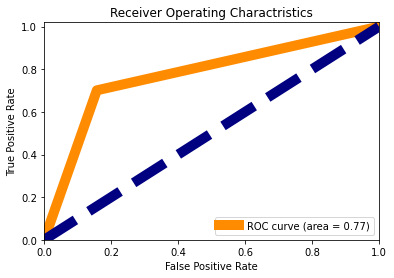

In [89]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

Saving the model:

In [90]:
import pickle
filename = 'customer_churn_analysis.pkl'
pickle.dump(model, open(filename, 'wb'))

Conclusion:

In [91]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
1404,0,0
1405,0,0
1406,0,1
1407,0,0
